## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

In [2]:
#read data
visa_data = pd.read_csv("EasyVisa.csv")

In [3]:
# make copy of the data to another variable to avoid changes to the original data
data = visa_data.copy()

### View the first 10 rows of the dataset

In [4]:
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


### View the last 10 rows of the dataset

In [5]:
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### View sample of the data

In [6]:
data.sample()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
17094,EZYV17095,North America,Master's,Y,N,4991,1923,Northeast,44027.92,Year,Y,Denied


### View the shape of the data set

In [7]:
data.shape

(25480, 12)

#### Observation: 
- The dataset has 25480 rows and 12 columns

### Check for missing values

In [8]:
data.isnull().sum().sum()

0

#### Observation:
- There are no missing values

### Check for the different data types in the data set using info method

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


### Check for duplicates in the data

In [10]:
data["case_id"].value_counts().sum()

25480

In [11]:
data.duplicated().any()

False

#### Observation:
- There are no duplicates in the data

In [12]:
# dropping the case_id column
data.drop("case_id", axis=1, inplace=True)

In [13]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [14]:
for i in cat_columns: # Loop through all categorical columns in the dataframe
    print("Unique values in", i, "are :")
    print(data[i].value_counts()) # print the different unique values in each column
    print("*" * 50) # print * to create a sort of boundary after every column values

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

In [15]:
# Let us take a look at the descrioption of the numerical columns data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Observation:
- Number of employees has negative values as shown by the min values
- Let us go ahead and check how many negative values are in that column
- After that we shall fix them by taking absolute values as number of employees can not be negative

In [16]:
#check for how many negative values we have in the no_of_employees column
(data["no_of_employees"]<0).sum()

33

#### Observations:
- There are 33 negative values in the no_of_employees column

In [17]:
# taking absolute values of the negative values in the no_of_employees column
data["no_of_employees"] = data["no_of_employees"].abs()

In [18]:
(data["no_of_employees"]<0).any()

False

In [19]:
# check the data descrioption to see if we have eliminated the negative values in the no_of_employees column
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.089207,22877.917453,11.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


## Exploratory Data Analysis (EDA)


### Univariate Analysis

In [20]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### From which continent do most employees come from?

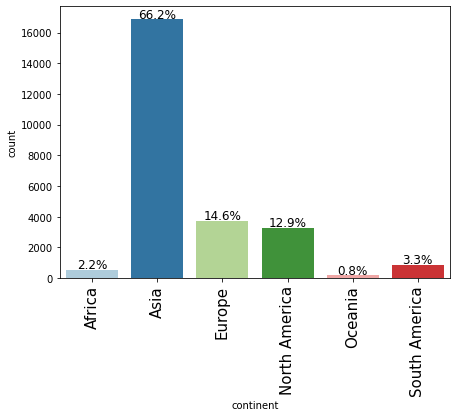

In [21]:
labeled_barplot(data, "continent", perc=True) 

- Most Employees are from Asia with 66.2%

### Which level of education do most employees have?

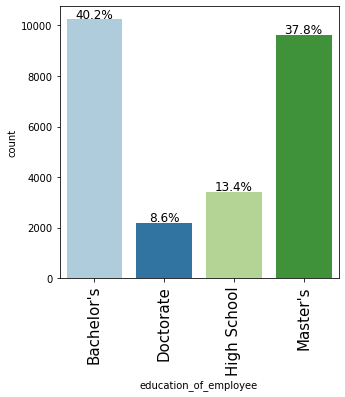

In [22]:
labeled_barplot(data, "education_of_employee", perc=True) 

- Most employees hold a bachelor's degeree followed by a Master's degree

### Observations on working experience of the employees

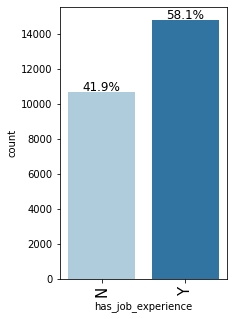

In [23]:
labeled_barplot(data, "has_job_experience", perc=True) 

- Most employees in our data set have  working experience

### What is the percentage of employees that require training for the jobs they apply for?

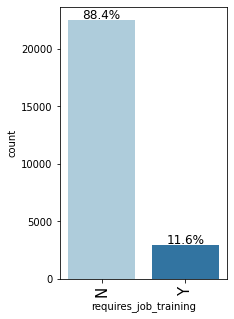

In [24]:
labeled_barplot(data, "requires_job_training", perc=True) 

- 88.4% of the employees in the data set do not require job training

### Which regions in the US do most foreign workers intend to work from?

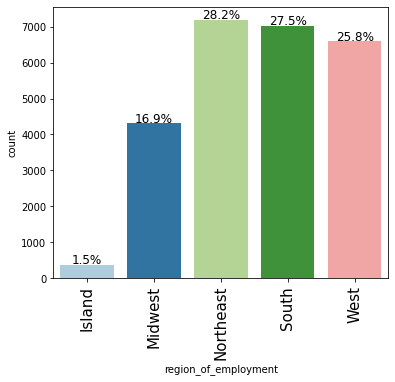

In [25]:
labeled_barplot(data, "region_of_employment", perc=True) 

- Most foreign workers intend to work from the North-Eastern, Southern and Western regions

### Do most employees intend to work full time of part-time?

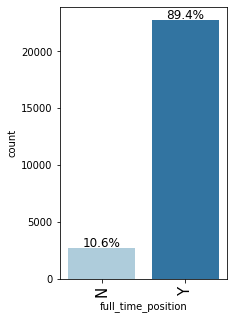

In [26]:
labeled_barplot(data, "full_time_position", perc=True)

- 89.4% of the Visa applicants intend to work full time

### Observations on Unit of wage

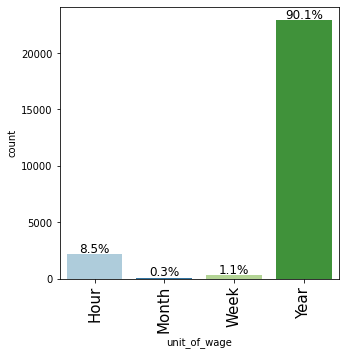

In [27]:
labeled_barplot(data, "unit_of_wage", perc=True)

- 90.1% of the units of wage provided are yearly
- It would make sense if the wage was in one unit so that the prevailing wage is also in one unit
- We would convert the unit of wage to one unit like monthly but we don't know how many hours a day an employee works or how many days a week employees have to work.

### What Percentage of visa applicants are certified?

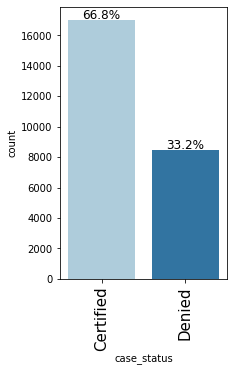

In [28]:
labeled_barplot(data, "case_status", perc=True)

- 66.8% of the applicants are certified

In [29]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on the number of employees in the company

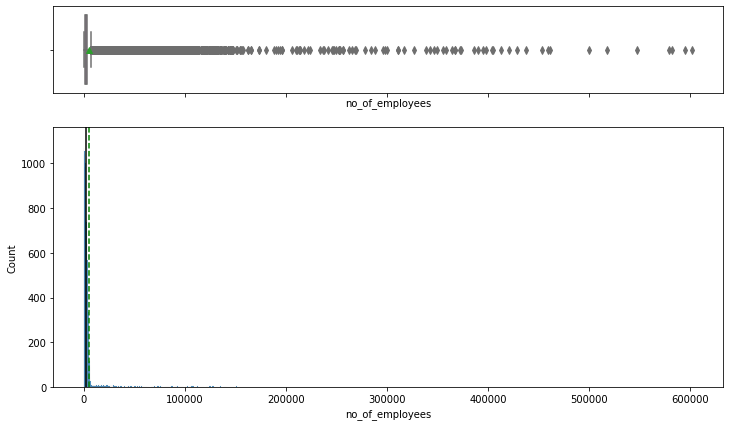

In [30]:
histogram_boxplot(data, "no_of_employees")

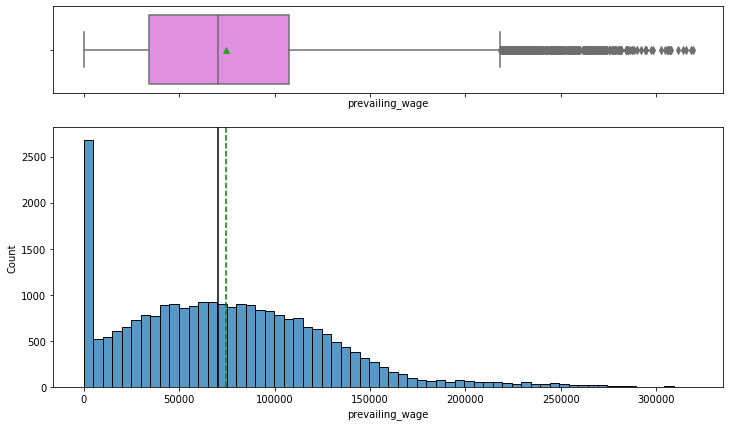

In [31]:
histogram_boxplot(data, "prevailing_wage")

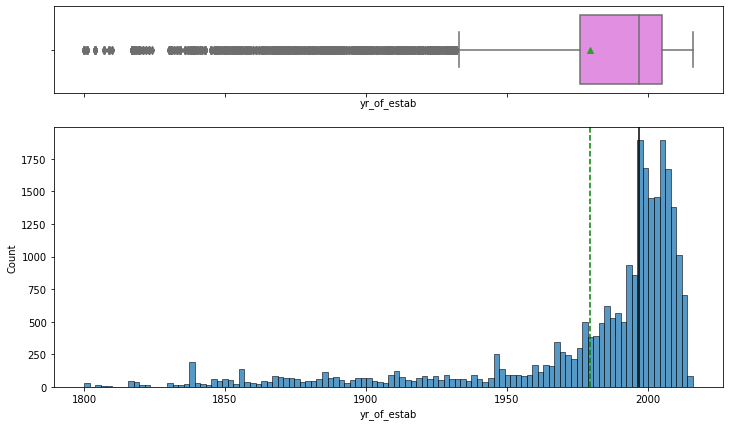

In [32]:
histogram_boxplot(data, "yr_of_estab")

## Bivariate Analysis

### Correlation Heat map

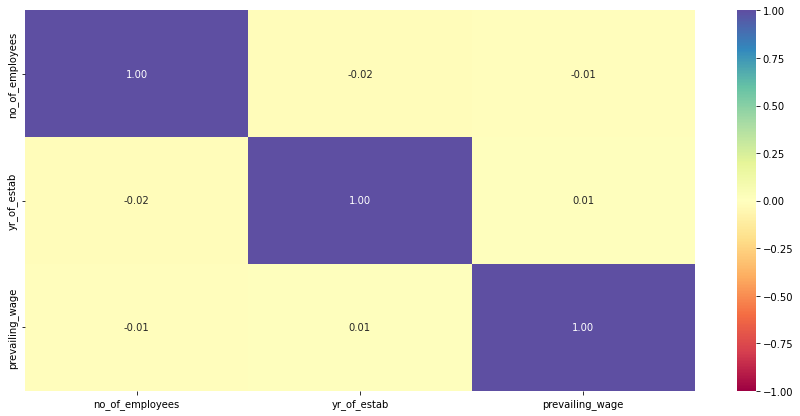

In [33]:
# creating a list of numeric columns
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# correlation heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[numeric_columns].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
);

In [34]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [35]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Does the level of Education has an impact on Visa certication?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


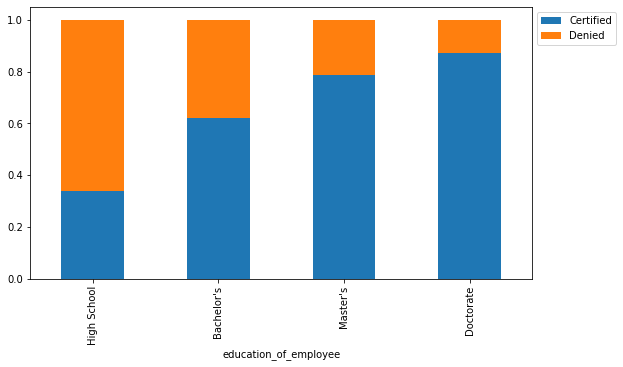

In [36]:
stacked_barplot(data, "education_of_employee", "case_status")

- The data shows that it is true, the level of education has an impact on visa certication as we can see that the higher the level of education, the lower the number of visas denied

### Which regions in the US have higher acceptance levels for Visa applications?

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


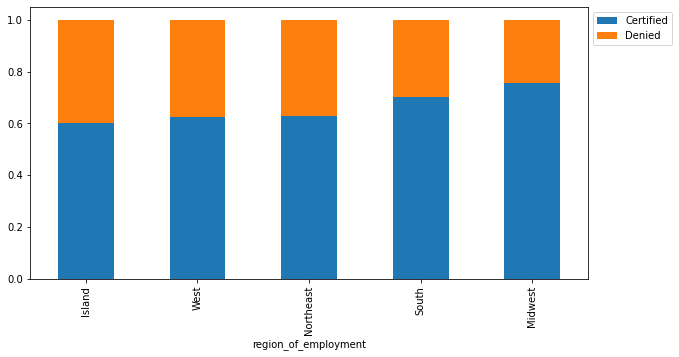

In [37]:
stacked_barplot(data, "region_of_employment", "case_status")

#### Observations:
- The MidWesr region has higher acceptance levels for visas as compared to other regions

### Continent vs Case Staus

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


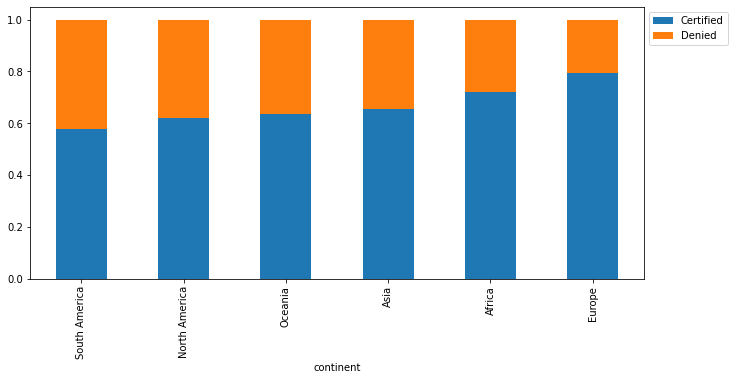

In [38]:
stacked_barplot(data, "continent", "case_status")

- Less applicants from Europe are denied Visas as compared to other continents

### Does job experience in some way affect the need to get job training?

has_job_experience         N      Y    All
requires_job_training                     
All                    10678  14802  25480
N                       8988  13537  22525
Y                       1690   1265   2955
------------------------------------------------------------------------------------------------------------------------


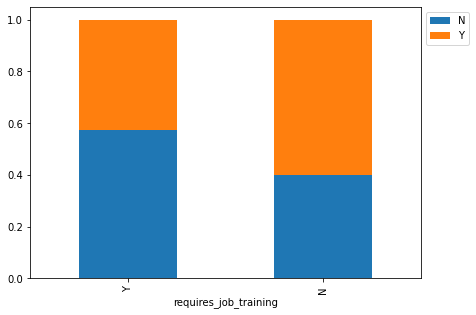

In [39]:
stacked_barplot(data, "requires_job_training", "has_job_experience")

#### Observations:
- Most people who have job experience do not require training

### How does requiring job training affect the status of the visa application?

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


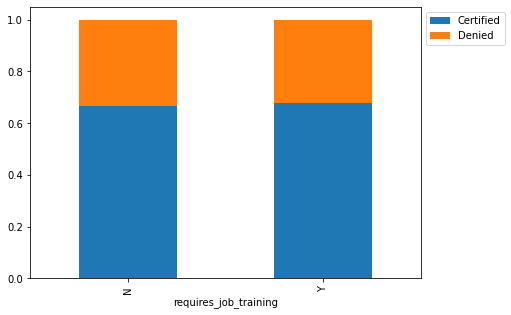

In [40]:
stacked_barplot(data, "requires_job_training", "case_status")

#### Observations:
- Requiring job training does not show much impact on visa status.
- This probably shows that requiring job training is one of the least important Independent variable

### Does having job experience have an impact on the Certification levels of Visas?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


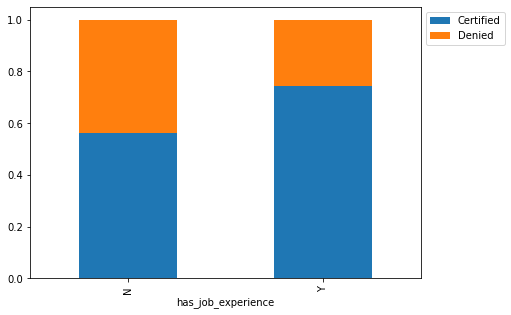

In [41]:
stacked_barplot(data, "has_job_experience", "case_status")

#### Observations:
- The number of certified Visas is more for applicants with job experience 

### Which pay unit is most likely to be denied a Visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


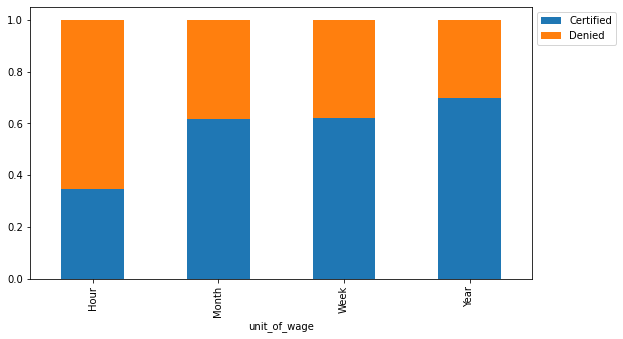

In [42]:
stacked_barplot(data, "unit_of_wage", "case_status")

#### Observations:
- More applicants who are to be paid hourly are denied as compared to other units of wage

### Which region certifies more of the visa applicants with the highest level of education(PhD)?

In [43]:
# Creating a new data frame with only employees who hold a PhD
phd_data = data[data["education_of_employee"]=="Doctorate"]

case_status           Certified  Denied   All
region_of_employment                         
All                        1912     280  2192
West                        604     110   714
Northeast                   567      89   656
South                       487      54   541
Midwest                     232      24   256
Island                       22       3    25
------------------------------------------------------------------------------------------------------------------------


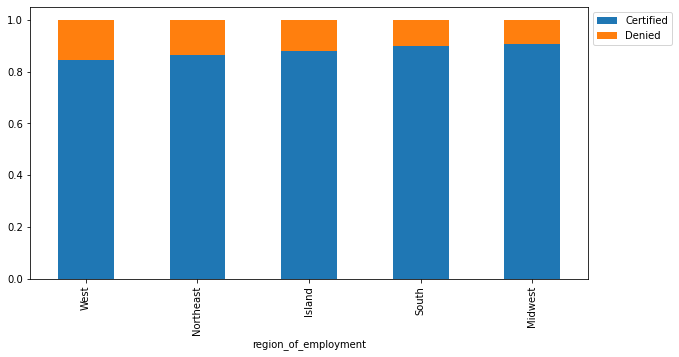

In [44]:
stacked_barplot(phd_data, "region_of_employment", "case_status")

#### Observations:
- The MidWest region certified visas of more PhD holders as compared to other regions

### How does the visa status change with the prevailing wage?

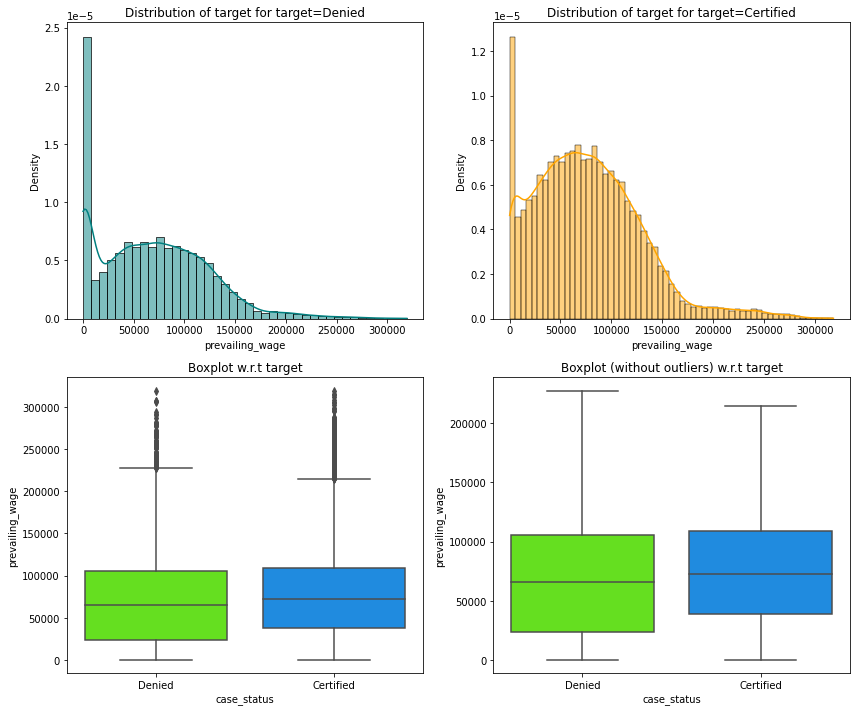

In [45]:
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

## Data Preprocessing

### Checking for Outliers

In [46]:
# make a copy of the data frame before making more changes
df = data.copy()

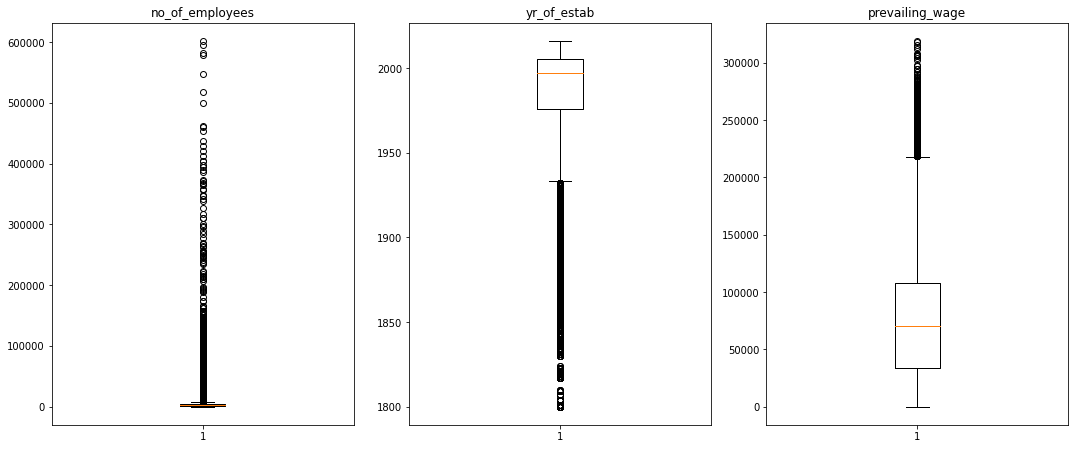

In [47]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

#### Observations:
- There are outliers in all of our numerical columns
- Since we are going to be working with decision trees mostly, We shall not treat outliers as decision trees are not sensitive to noisy data and outliers.

In [48]:
# Converting the target variable to numerical
df["case_status"] = df["case_status"].apply(
    lambda x: 1 if x == "Certified" else 0
)

**NB:** 
- For *education_of_employee* field we are going to assign numbers to the different levels of education with 1 being assigned to the lowest level
- Then we shall create dummies for the rest of thye categorical columns

In [49]:
df["education_of_employee"].value_counts()

Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64

In [50]:
replaceStruct = {"education_of_employee":     {"High School": 1, "Bachelor's": 2 ,"Master's": 3 ,"Doctorate":4} } 
df=df.replace(replaceStruct)

In [51]:
# Lets take a look at the data after the changes
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480.0,NaN,NaN,NaN,2.415934,0.826718,1.0,2.0,2.0,3.0,4.0
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.089207,22877.917453,11.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  int64  
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 2.1+ MB


In [53]:
X = df.drop(["case_status"], axis=1)
y = df["case_status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1, stratify=y
)

In [54]:
# let us make sure all our columns are now numerical
X_train.head()

,education_of_employee,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
21,3,1706,2013,137694.98,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0
7332,4,2321,2009,11641.40,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1
20579,2,1923,2005,21688.56,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
22326,1,434,1998,58341.54,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1
13237,1,5870,2011,140996.50,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1


In [55]:
# Checking percentage of classes in training set
y.value_counts(1)

1    0.667896
0    0.332104
Name: case_status, dtype: float64

In [56]:
# Checking percentage of classes in testing set
y_test.value_counts(1)

1    0.667844
0    0.332156
Name: case_status, dtype: float64

In [57]:
# Checking the shape of the training set
X_train.shape

(17836, 19)

In [58]:
# Checking the shape of the testing set
X_test.shape

(7644, 19)

## Building bagging and boosting models

### Model evaluation criterion
Model can make wrong predictions as:
Model predicts that the visa application will get certified but in reality, the visa application should get denied.
Model predicts that the visa application will not get certified but in reality, the visa application should get certified.
### Which case is more important?
Both the cases are important as:

If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.

### How to reduce the losses?
F1 Score can be used a the metric for evaluation of the model, greater the F1 score higher are the chances of minimizing False Negatives and False Positives.
We will use balanced class weights so that model focuses equally on both classes.

**Before building the model, let's create functions to calculate different metrics- Accuracy, Recall and Precision and plot the confusion matrix.**

In [59]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [60]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

### 1. Decision Tree Model

In [61]:
dtree = DecisionTreeClassifier(criterion='gini',class_weight="balanced",random_state=1)

In [62]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

#### Checking model performance on training set

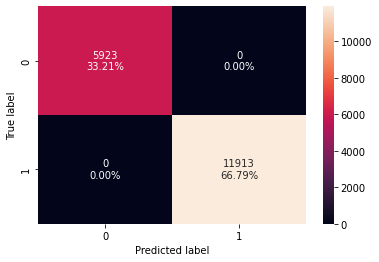

In [63]:
confusion_matrix_sklearn(dtree, X_train, y_train)

In [64]:
decision_tree_perf_train = model_performance_classification_sklearn(
    dtree, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking model performance on test set

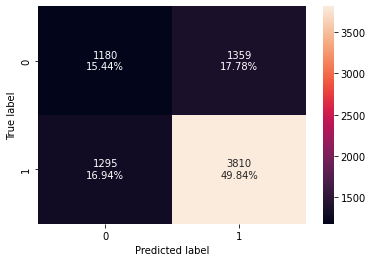

In [65]:
confusion_matrix_sklearn(dtree, X_test, y_test)

In [66]:
decision_tree_perf_test = model_performance_classification_sklearn(
    dtree, X_test, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.6528,0.746327,0.737086,0.741678


#### Observations:
- The decision tree with default parameters is over fitting the data. This is shown by the big difference in the training set performance and testing set performance.
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### 2. Hyperparameter tuning - Decision tree

In [67]:
# Choose the type of classifier.
dtree_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

#### Checking performance on training set

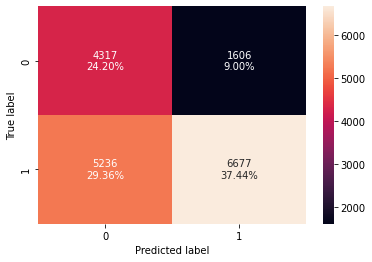

In [68]:
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [69]:
dtree_tune_perf_train = model_performance_classification_sklearn(
dtree_estimator, X_train, y_train
)
dtree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.616394,0.56048,0.806109,0.66122


#### Checking performance on test data set

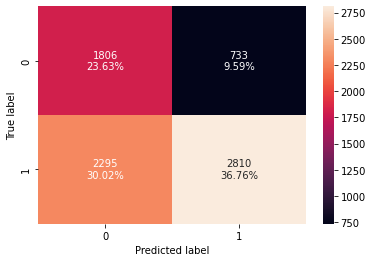

In [70]:
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [71]:
dtree_tune_perf_test = model_performance_classification_sklearn(
dtree_estimator, X_test, y_test
)
dtree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.603872,0.550441,0.793113,0.649861


#### Observations:
- The overfitting is reduced after hyperparameter tuning and the f1 score has increased by approx 7%.
- The model is generalizing the data better as compared to the decision tree with default parameters

## Bagging models

### 3. Bagging Classifier

In [72]:
#base_estimator for bagging classifier is a decision tree by default
bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train,y_train)

BaggingClassifier(random_state=1)

#### Checking model performance on Training set

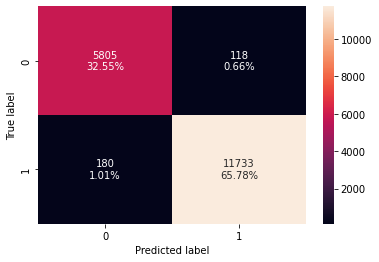

In [73]:
confusion_matrix_sklearn(bagging_estimator, X_train, y_train)

In [74]:
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
bagging_estimator, X_train, y_train
)
bagging_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.983292,0.98489,0.990043,0.98746


#### Checking model performance on Testing set

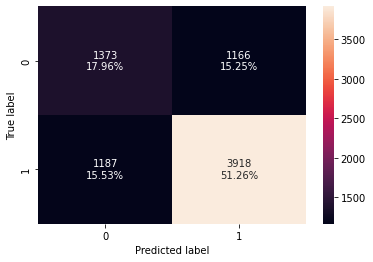

In [75]:
confusion_matrix_sklearn(bagging_estimator, X_test, y_test)

In [76]:
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
bagging_estimator, X_test, y_test
)
bagging_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.692177,0.767483,0.770653,0.769065


#### Observations:
- The bagging classifier with default parameters is over-fitting the data
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### 4. Hyperparameter tuning - Bagging Classier model

In [77]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {  "max_samples": [0.7, 0.9],
                "max_features": [0.7, 0.9],
                "n_estimators": np.arange(90, 111, 10),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=110,
                  random_state=1)

#### Checking performance on training dataset

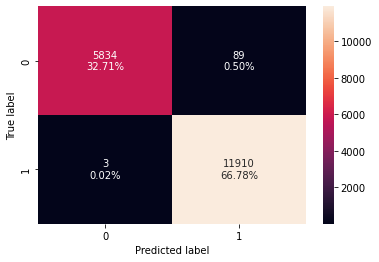

In [78]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [79]:
bagging_classifier_tuned_model_train_perf = model_performance_classification_sklearn(
bagging_estimator_tuned, X_train, y_train
)
bagging_classifier_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.994842,0.999748,0.992583,0.996153


#### Checking performance on testing data

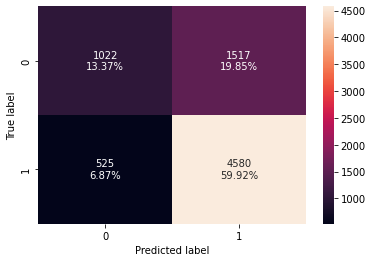

In [80]:
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [81]:
bagging_classifier_tuned_model_test_perf = model_performance_classification_sklearn(
bagging_estimator_tuned, X_test, y_test
)
bagging_classifier_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.732862,0.89716,0.751189,0.817711


#### Observations:
- The hyperparamater tuned bagging classifier is still over-fitting the data
- But, the performance has improved on the test data set

### 5. Let's try using logistic regression as the base estimator for bagging classifier:
- Now, let's try and change the `base_estimator` of the bagging classifier, which is a decision tree by default.
- We will pass the logistic regression as the base estimator for bagging classifier.

In [82]:
bagging_lr=BaggingClassifier(base_estimator=LogisticRegression(solver='liblinear',random_state=1,max_iter=1000),random_state=1)
bagging_lr.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=1000,
                                                    random_state=1,
                                                    solver='liblinear'),
                  random_state=1)

#### Checking performance on training data

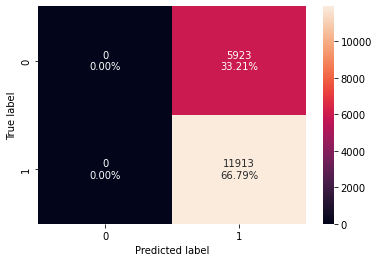

In [83]:
confusion_matrix_sklearn(bagging_lr, X_train, y_train)

In [84]:
bagging_lr_model_train_perf = model_performance_classification_sklearn(
bagging_lr, X_train, y_train
)
bagging_lr_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.667919,1.0,0.667919,0.800901


#### Checking Performance on testing data

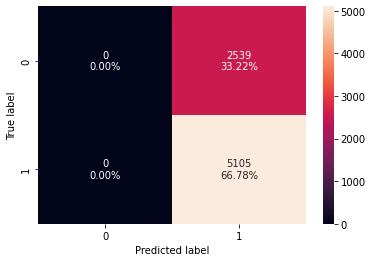

In [85]:
confusion_matrix_sklearn(bagging_lr, X_test, y_test)

In [86]:
bagging_lr_model_test_perf = model_performance_classification_sklearn(
bagging_lr, X_test, y_test
)
bagging_lr_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.667844,1.0,0.667844,0.800847


#### Observations:
- Bagging classifier with logistic regression as base_estimator is not overfitting the data and F1 score is great

### 6. Random Forest

In [87]:
#Train the random forest classifier
rf_estimator=RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

#### Checking performance on training data

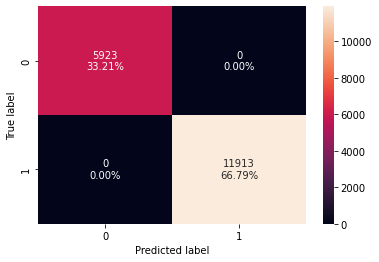

In [88]:
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [89]:
rf_estimator_model_train_perf = model_performance_classification_sklearn(
rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Checking performance on testing data

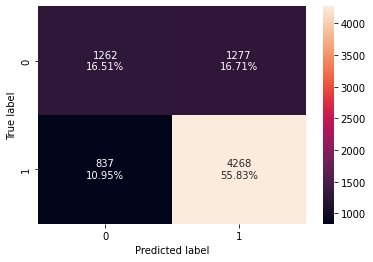

In [90]:
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [91]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
rf_estimator, X_test, y_test
)
rf_estimator_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.723443,0.836043,0.769702,0.801502


#### Observations:
- The Random forest model with default parameters is over fitting the data
- Let's see if we can reduce overfitting and improve performance on test data by tuning hyperparameters.

### 7. Hyperparameter tuning - Random forest

**Now, let's see if we can get a better model by tuning the random forest classifier.**

In [92]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

# Grid of parameters to choose from
## add from article
parameters = {  "max_depth": list(np.arange(5, 15, 5)),
                "max_features": ["sqrt", "log2"],
                "min_samples_split": [5, 7],
                "n_estimators": np.arange(15, 26, 5),
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_split=7,
                       n_estimators=25, oob_score=True, random_state=1)

#### Checking model performance on training data

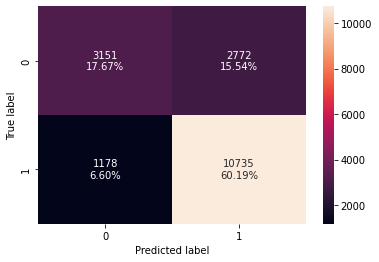

In [93]:
confusion_matrix_sklearn(rf_estimator_tuned, X_train, y_train)

In [94]:
rf_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
rf_estimator_tuned, X_train, y_train
)
rf_estimator_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.778538,0.901116,0.794773,0.844611


#### Checking model performance on testing data

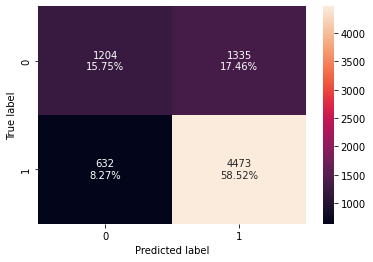

In [95]:
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test)

In [96]:
rf_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
rf_estimator_tuned, X_test, y_test
)
rf_estimator_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742674,0.8762,0.770145,0.819756


#### Observations:
- The overfitting is reduced after hyperparameter tuning and the f1 score has increased by approx 2%.
- The model is generalizing the data better as compared to the random forest with default parameters

## Boosting Models

### 8. AdaBoost Classifier

In [97]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

#### Checking model performance on training data

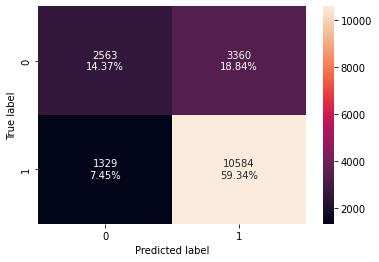

In [98]:
confusion_matrix_sklearn(abc, X_train, y_train)

In [99]:
abc_model_train_perf = model_performance_classification_sklearn(
abc, X_train, y_train
)
abc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.737105,0.888441,0.759036,0.818656


#### Checking performance on testing data

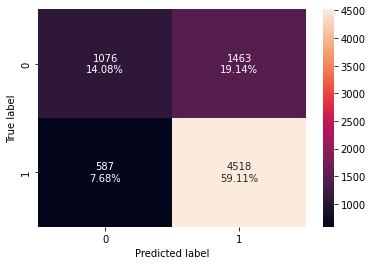

In [100]:
confusion_matrix_sklearn(abc, X_test, y_test)

In [101]:
abc_model_test_perf = model_performance_classification_sklearn(
abc, X_test, y_test
)
abc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.731816,0.885015,0.755392,0.815082


#### Observations:
- The Ada boost Classifier with default parameters is not over-fitting the data
- F1 score is good too
- Let us see if we can improve performance on test data by tuning hyperparameters.

### 9. Hyperparameter tuning - Ada Boost Classifier

In [102]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, class_weight="balanced", random_state=1),
        DecisionTreeClassifier(max_depth=2, class_weight="balanced", random_state=1),
    ],
    "n_estimators": np.arange(80, 101, 10),
    "learning_rate": np.arange(0.1, 0.4, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=100, random_state=1)

#### Checking model performance on training data

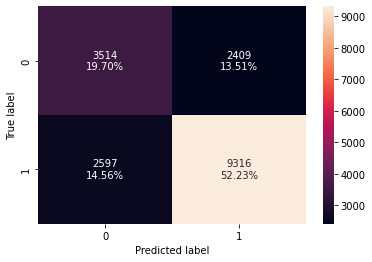

In [103]:
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [104]:
abc_tuned_model_train_perf = model_performance_classification_sklearn(
abc_tuned, X_train, y_train
)
abc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.719332,0.782003,0.794542,0.788222


#### Checking performance on testing data

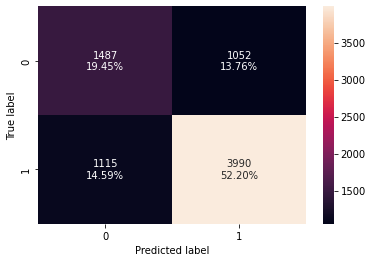

In [105]:
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [106]:
abc_tuned_model_test_perf = model_performance_classification_sklearn(
abc_tuned, X_test, y_test
)
abc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.71651,0.781587,0.791353,0.786439


#### Observations:
- F1 score has reduced by by approximately 3% as compared to the ada boost model with default parameters

### 10. Gradient Boost Classifier

In [107]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

#### Checking Performance on training data

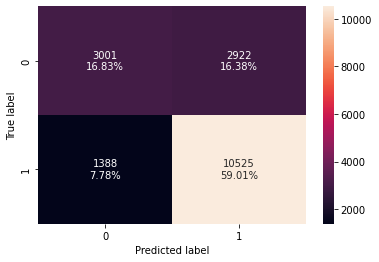

In [108]:
confusion_matrix_sklearn(gbc, X_train, y_train)

In [109]:
gbc_model_train_perf = model_performance_classification_sklearn(
gbc, X_train, y_train
)
gbc_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.758354,0.883489,0.782702,0.830047


#### Checking Performance on Testing data

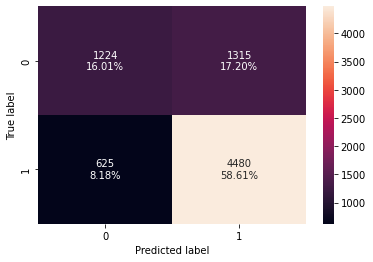

In [110]:
confusion_matrix_sklearn(gbc, X_test, y_test)

In [111]:
gbc_model_test_perf = model_performance_classification_sklearn(
gbc, X_test, y_test
)
gbc_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.746206,0.877571,0.77308,0.822018


#### Observations:
- The performance of the gradient boost classifier with default parameters on the test data is great and there is no overfitting

**11. Let's try using AdaBoost classifier as the estimator for initial predictions**

In [112]:
gbc_init = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)
gbc_init.fit(X_train,y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           random_state=1)

#### Checking performance on training set

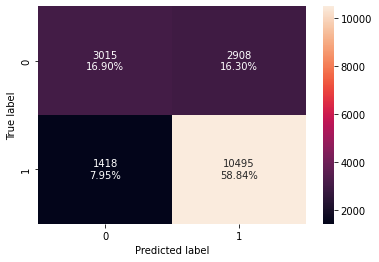

In [113]:
confusion_matrix_sklearn(gbc_init, X_train, y_train)

In [114]:
gbc_init_model_train_perf = model_performance_classification_sklearn(
gbc_init, X_train, y_train
)
gbc_init_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.757457,0.88097,0.783034,0.82912


#### Checking performance on testing set

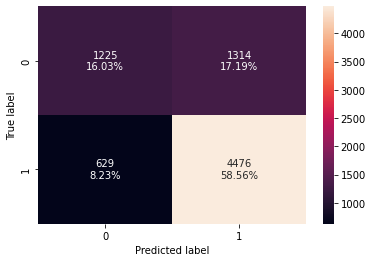

In [115]:
confusion_matrix_sklearn(gbc_init, X_test, y_test)

In [116]:
gbc_init_model_test_perf = model_performance_classification_sklearn(
gbc_init, X_test, y_test
)
gbc_init_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.745814,0.876787,0.773057,0.821661


### Observations:
- The performance on the test data is almost the same as that of the gradient boost classifier with default parameters.
- This model just shows a slight improvement in performance on test data

### 12. Hyperparameter tuning - Gradient Boosting Classifier

In [117]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [200, 250],
    "subsample": [0.9, 1],
    "max_features": [0.8, 0.9],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=200, random_state=1,
                           subsample=1)

#### Checking performance on train data

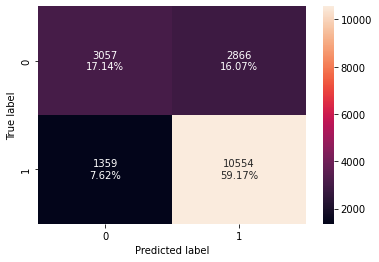

In [118]:
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [119]:
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
gbc_tuned, X_train, y_train
)
gbc_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.76312,0.885923,0.786438,0.833221


#### Checking performance on test data

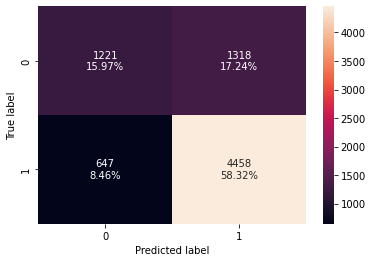

In [120]:
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [121]:
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
gbc_tuned, X_test, y_test
)
gbc_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.742936,0.873262,0.771814,0.81941


#### Observations:
- The tuned gradient boost classifier model does not overfit the data
- The f1 score of the tuned gradient boost classifier is approximately equal to that of the gradient boost classifier with default parameters.

### 13. XGBoost Classifier

In [122]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=1,
              reg_alpha=0, reg_lambda=1, ...)

#### Checking performance on training data

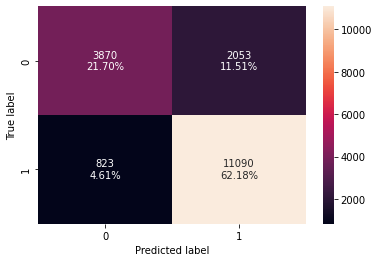

In [123]:
confusion_matrix_sklearn(xgb, X_train, y_train)

In [124]:
xgb_model_train_perf = model_performance_classification_sklearn(
xgb, X_train, y_train
)
xgb_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.838753,0.930916,0.843795,0.885217


#### Checking performance on testing data

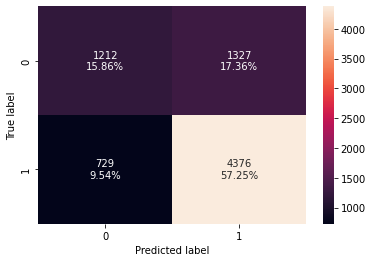

In [125]:
confusion_matrix_sklearn(xgb, X_test, y_test)

In [126]:
xgb_model_test_perf = model_performance_classification_sklearn(
xgb, X_test, y_test
)
xgb_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.731031,0.857199,0.767315,0.809771


#### Observations:
- The XGBoost classifier with default parameters is overfitting the data
- F1 score is good on the test data
- Let us use hypaparameters to tune this model and see if we shall reduce overfitting and also improve performance.

### 13. Hyperparameter tuning - XGBoost Classifier

In [127]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.9,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='logloss', gamma=5, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, ...)

#### Testing performance on train set

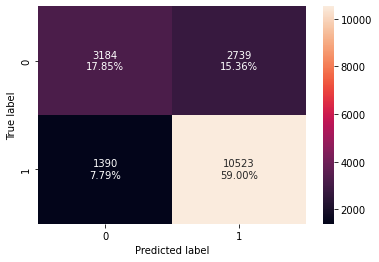

In [128]:
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [129]:
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
xgb_tuned, X_train, y_train
)
xgb_tuned_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.768502,0.883321,0.79347,0.835988


#### Testing performance on testing set

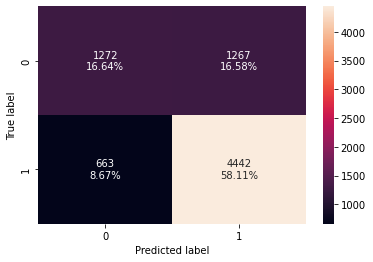

In [130]:
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [131]:
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
xgb_tuned, X_test, y_test
)
xgb_tuned_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.747514,0.870127,0.77807,0.821528


#### Observations:
- F1 score on test data has improved by approximately 1 % as compared to the XGBoost classifier with default parameters
- Also, we have reduced over-fitting of the data


### 14. Stacking Classifier

**Now, let's build a stacking model with the tuned models - decision tree, random forest, and gradient boosting, then use XGBoost to get the final prediction.**

In [132]:
estimators=[('Decision Tree', dtree_estimator),('Random Forest', rf_estimator_tuned),
           ('Gradient Boosting', gbc_tuned)]
final_estimator=XGBClassifier(random_state=1)

In [133]:
stacking_estimator=StackingClassifier(estimators=estimators, final_estimator=final_estimator,cv=5)
stacking_estimator.fit(X_train,y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       min_samples_leaf=3,
                                                       random_state=1)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       max_features='sqrt',
                                                       min_samples_split=7,
                                                       n_estimators=25,
                                                       oob_score=True,
                                                       rand

  #### Checking model performance on Train set

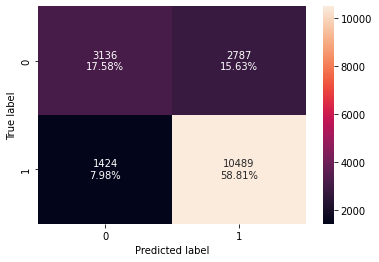

In [134]:
confusion_matrix_sklearn(stacking_estimator, X_train, y_train)

In [135]:
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_estimator, X_train, y_train
)
stacking_classifier_model_train_perf

,Accuracy,Recall,Precision,F1
0,0.763904,0.880467,0.790072,0.832824


#### Checking model performance on Test set

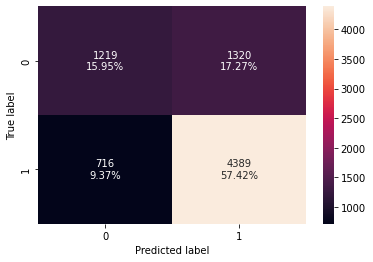

In [136]:
confusion_matrix_sklearn(stacking_estimator, X_test, y_test)

In [137]:
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_estimator, X_test, y_test
)
stacking_classifier_model_test_perf

,Accuracy,Recall,Precision,F1
0,0.733647,0.859745,0.768786,0.811726


#### Observations:
- The model is not over-fitting the data
- The performnace on test data is also good
- F1 score on the test data is also good

## Model Performance Comparison and Conclusions

In [138]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_tune_perf_train.T,
        bagging_classifier_model_train_perf.T,
        bagging_classifier_tuned_model_train_perf.T,
        bagging_lr_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_estimator_tuned_model_train_perf.T,
        abc_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gbc_model_train_perf.T,
        gbc_init_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Bagging Classifier lr",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "gbc initialized with abc",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Bagging Classifier lr,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,gbc initialized with abc,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.616394,0.983292,0.994842,0.667919,1.0,0.778538,0.737105,0.719332,0.758354,0.757457,0.763120,0.838753,0.768502,0.763904
Recall,1.0,0.560480,0.984890,0.999748,1.000000,1.0,0.901116,0.888441,0.782003,0.883489,0.880970,0.885923,0.930916,0.883321,0.880467
Precision,1.0,0.806109,0.990043,0.992583,0.667919,1.0,0.794773,0.759036,0.794542,0.782702,0.783034,0.786438,0.843795,0.793470,0.790072
F1,1.0,0.661220,0.987460,0.996153,0.800901,1.0,0.844611,0.818656,0.788222,0.830047,0.829120,0.833221,0.885217,0.835988,0.832824


In [139]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_tune_perf_test.T,
        bagging_classifier_model_test_perf.T,
        bagging_classifier_tuned_model_test_perf.T,
        bagging_lr_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_estimator_tuned_model_test_perf.T,
        abc_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gbc_model_test_perf.T,
        gbc_init_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Bagging Classifier lr",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "gbc initialized with abc",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_train_comp_df

Testing performance comparison:


,Decision Tree,Tuned Decision Tree,Bagging Classifier,Tuned Bagging Classifier,Bagging Classifier lr,Random Forest,Tuned Random Forest,Adaboost Classifier,Tuned Adaboost Classifier,Gradient Boost Classifier,gbc initialized with abc,Tuned Gradient Boost Classifier,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.652800,0.603872,0.692177,0.732862,0.667844,0.723443,0.742674,0.731816,0.716510,0.746206,0.745814,0.742936,0.731031,0.747514,0.733647
Recall,0.746327,0.550441,0.767483,0.897160,1.000000,0.836043,0.876200,0.885015,0.781587,0.877571,0.876787,0.873262,0.857199,0.870127,0.859745
Precision,0.737086,0.793113,0.770653,0.751189,0.667844,0.769702,0.770145,0.755392,0.791353,0.773080,0.773057,0.771814,0.767315,0.778070,0.768786
F1,0.741678,0.649861,0.769065,0.817711,0.800847,0.801502,0.819756,0.815082,0.786439,0.822018,0.821661,0.819410,0.809771,0.821528,0.811726


### Important features of the final model
 - We shall go with the model giving the best F1 score on the test data which is *Gradient Boost classifier* with default parameters(gbc)

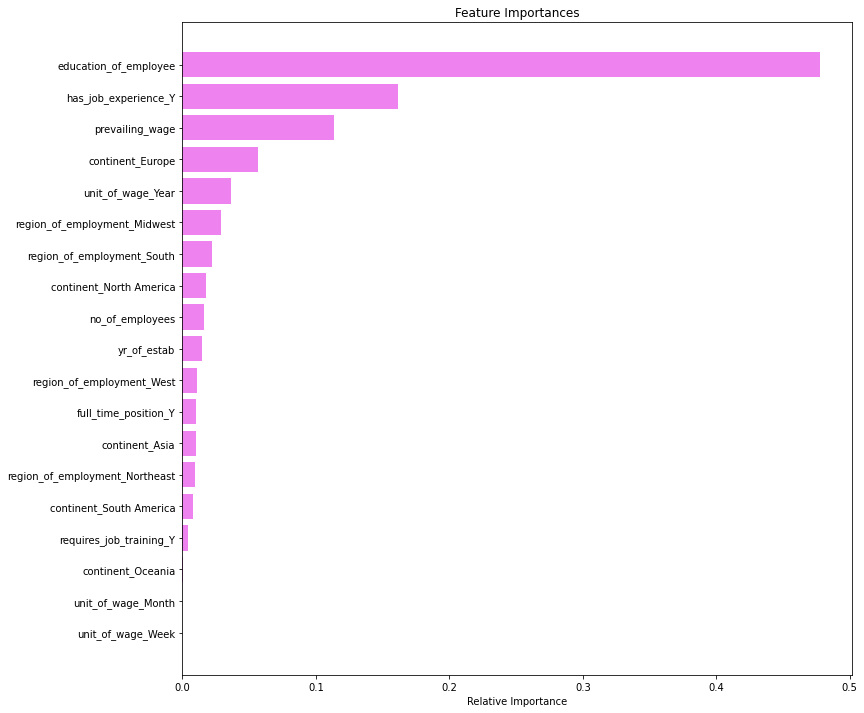

In [140]:
feature_names = X_train.columns
importances = gbc.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Actionable Insights and Recommendations

#### Actionable Insights:
- According to our analysis, we saw that the higher the education level, the higher chances of the Visa being certified.
- We also saw that candidates have prior experience were mostly certified. Those that  have experience mostly do not require job training.
- The unit of wage also had an influence to visa certification as we saw that employees who would be paid hourly had higher chances of being denied a visa.
- The five top most important features in descending order are:
    - Education of employee
    - Having job experience
    - prevaling wage
    - Continent of origin of the employee
    - unit of wage yearly
**NB: Education of the employee is a the biggest influencing factor to visa certification**
    
#### Recommendations:
- More data can be collected on visa applicants like criminal records. This can be a very important feature in visa certification/denial
- The gradient boost classifier model gives better results on the test data with the highest f1 score of 82.20% as compared to the other models. Hence it is the model that I recommend for OFLC